# Tentamen - 13 april 2021

**Naam:**

**Studentnummer:**

In [10]:
###Packages inladen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. Theorie**

a. Welk data type krijg je terug als je twee waardes vergelijkt met een logische operator? (2pt) <br> 
   Geef een voorbeeld van een vergelijking met een logische operator (3pt)

In [3]:
#boolean
type(4>5)

bool

b. Geef een voorbeeld van een python list (2pt) met drie verschillende data types (3pt)

In [9]:
type(['a', 1, True])


list

**2. De verschrikkelijke oorlog in Oekraïne is ook in cijfers uit te drukken. Aan de hand van cijfers van het Oekraïnse leger gaan we het verloop van de oorlog bekijken. De datasets geven het cumulatieve aantal slachtoffers/vernietigde aantal voertuigen**

a. Lees de bestanden Oorlog_personeel.csv en Oorlog_voertuigen.xlsx in. Zorg dat ze hetzelfde format krijgen als de gegeven pickle bestanden (2pt)

In [14]:
#OorlogPersonen = pd.read_pickle("OorlogPersonen.pkl")
op = pd.read_csv('Oorlog_personeel.csv')
op.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [15]:
#OorlogVoertuigen = pd.read_pickle("OorlogVoertuigen.pkl")
ov = pd.read_excel('Oorlog_voertuigen.xlsx')
ov.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


b. Inspecteer de dataframe OorlogVoertuigen op NA-waardes (2pt)

In [16]:
ov.isna().sum()

date                      0
day                       0
aircraft                  0
helicopter                0
tank                      0
APC                       0
field artillery           0
MRL                       0
military auto             0
fuel tank                 0
drone                     0
naval ship                0
anti-aircraft warfare     0
special equipment        19
mobile SRBM system       29
dtype: int64

c. Inspecteer de kolommen met NA-waardes verder. Vul de NA-waardes met een logische waarde. (2pt) Beargumenteer waarom dit een logische waarde is (2pt)

In [20]:
ov = ov.fillna(0)

Argument: 

d. Vanaf nu gebruiken we de dataframe OorlogPersonen. Zet de kolom date om naar een datetime format (3pt)

In [26]:
op["date"] = pd.to_datetime(op["date"])

e. Maak een nieuwe kolom week, die het weeknummer bevat (2pt) <br> Antwoord kan een Future warning geven, mag je negeren

In [29]:
#OorlogPersonenDateTime = pd.read_pickle("OorlogPersonenDateTime.pkl")
op['week'] = op['date'].dt.week 

C:\Users\ljc_c\AppData\Local\Temp\ipykernel_12972\187277608.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  op['week'] = op['date'].dt.week


f. Bereken het aantal gesneuvelde aantal soldaten per dag (Kolom personnel) (Gegevens zijn cumulatief) (2pt) <br> Vul de eerste rij met 0 (1pt)

In [38]:
#OorlogPersonenWeek = pd.read_pickle("OorlogPersonenWeek.pkl")
op['gpd'] = op['personnel'].diff().fillna(0)
op.head()

,date,day,personnel,personnel*,POW,week,gpd
0,2022-02-25,2,2800,about,0,8,0.0
1,2022-02-26,3,4300,about,0,8,1500.0
2,2022-02-27,4,4500,about,0,8,200.0
3,2022-02-28,5,5300,about,0,9,800.0
4,2022-03-01,6,5710,about,200,9,410.0


g. Bereken het aantal gesneuvelde soldaten per weeknummer (4pt)

In [41]:
#OorlogPersonenDag = pd.read_pickle("OorlogPersonenDag.pkl")
op.groupby('week')['gpd'].sum()

week
8     1700.0
9     6500.0
10    1000.0
11    2700.0
12    1900.0
13    1400.0
Name: gpd, dtype: float64

**3. Corona. De maatregelen zijn opgeheven (maar is de pandemie voorbij?). Laten we een terugblik doen aan de hand van de data. De dataset bevat per land/regio het aantal cases, opnames etc. per dag.**

Laad de data in met onderstaande code

In [42]:
Corona = pd.read_pickle("Corona.pkl")
Corona.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


a. Selecteer alleen de data van Nederland (kolom location - "Netherlands") (2pt)

In [49]:
nl = Corona[Corona['location'] == 'Netherlands']
nl

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
112057,NLD,Europe,Netherlands,2020-02-27,1.0,1.0,NaN,NaN,NaN,NaN,...,24.4,27.3,NaN,3.32,82.28,0.944,NaN,NaN,NaN,NaN
112058,NLD,Europe,Netherlands,2020-02-28,6.0,5.0,NaN,NaN,NaN,NaN,...,24.4,27.3,NaN,3.32,82.28,0.944,NaN,NaN,NaN,NaN
112059,NLD,Europe,Netherlands,2020-02-29,10.0,4.0,NaN,NaN,NaN,NaN,...,24.4,27.3,NaN,3.32,82.28,0.944,NaN,NaN,NaN,NaN
112060,NLD,Europe,Netherlands,2020-03-01,18.0,8.0,NaN,NaN,NaN,NaN,...,24.4,27.3,NaN,3.32,82.28,0.944,-2332.1,-7.62,-8.61,-135.799641
112061,NLD,Europe,Netherlands,2020-03-02,24.0,6.0,NaN,NaN,NaN,NaN,...,24.4,27.3,NaN,3.32,82.28,0.944,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112819,NLD,Europe,Netherlands,2022-03-30,7927676.0,27783.0,29607.286,22068.0,37.0,17.857,...,24.4,27.3,NaN,3.32,82.28,0.944,NaN,NaN,NaN,NaN
112820,NLD,Europe,Netherlands,2022-03-31,7953120.0,25444.0,27656.714,22094.0,26.0,19.429,...,24.4,27.3,NaN,3.32,82.28,0.944,NaN,NaN,NaN,NaN
112821,NLD,Europe,Netherlands,2022-04-01,7974872.0,21752.0,25765.000,22100.0,6.0,17.429,...,24.4,27.3,NaN,3.32,82.28,0.944,NaN,NaN,NaN,NaN
112822,NLD,Europe,Netherlands,2022-04-02,7991823.0,16951.0,24166.000,22114.0,14.0,16.571,...,24.4,27.3,NaN,3.32,82.28,0.944,NaN,NaN,NaN,NaN


b. Inspecteer het aantal nieuwe gevallen (new_cases) op outliers. (2pt) Verwijder de rijen die als outlier gezien kunnen worden (indien noodzakelijk) (2pt)

<AxesSubplot:>

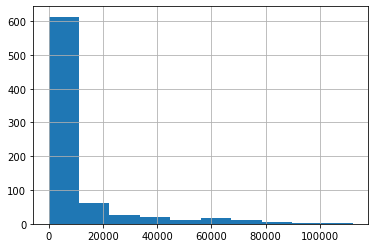

In [47]:
#CoronaNL = pd.read_pickle("CoronaNL.pkl")
nl = nl[nl["new_cases"]<300000]
nl['new_cases'].hist()

c. Inspecteer de verhouding tussen het aantal cases (new_cases) en het aantal overledene (new_deaths) (2pt) en verwijder outliers waar nodig (2pt)

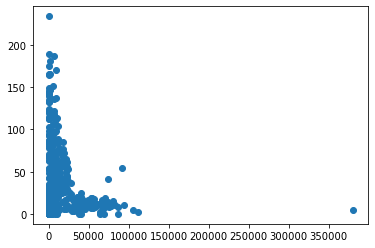

In [50]:
plt.scatter(nl['new_cases'], nl['new_deaths'])

**4. Het is bijna Pasen/Suikerfeest! Tijd voor veel chocolade uiteraard. Maar welke chocolade heeft de beste kwaliteit? Tijd voor een data science approach**

a. Lees de datasets Chocolade.csv en Beans.csv in. Zorg dat ze hetzelfde format krijgen als de gegeven pickle bestanden (2pt)

In [ ]:
#Chocolade = pd.read_pickle("Chocolade.pkl")
#Beans = pd.read_pickle("Beans.pkl")


b. Voeg de dataset samen zodat er per boon ook bekend is welk deze vandaan komt (4pt)

c. Bepaal uit welk land (Broad.Bean.Origin) gemiddeld gezien de chocolade komt met de hoogste rating. Sorteer de waardes van hoog naar laag (4pt)

In [ ]:
#MergedChoc = pd.read_pickle("MergedChoc.pkl")


d. Ecuador staat bekend om zijn goede chocolade. De spelling van dit land is deze dataset nogal verschillend. <br> <br> Filter de dataset op waardes van Broad.Bean.Origin op het bevatten de tekst "Ecu". (3pt) <br> <br>
Zorg ervoor dat het niet uitmaakt of het met kleine of hoofdletters is geschreven (1pt) <br>
Negeer NA-waardes (1pt)

e. Bepaal het aantal unieke manieren waarop Ecuador is meegenomen in de spelling (2pt) <br> Gebruik het antwoord van vraag d. of de gegeven pickle file

In [ ]:
#ChocEcuador = pd.read_pickle("ChocEcuador.pkl")


f. Selecteer alleen rijen in de dataset (ChocEcuador) waarbij de spelling voor minimaal 75% overeen komt met de correcte spelling ("Ecuador")(6pt)